In [1]:
print("start")

start


In [2]:
#!pip install tensorflow

In [3]:
import tensorflow as tf
tf.__version__

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.12.0'

In [4]:
from tensorflow.keras.preprocessing.text import one_hot

In [5]:
### sentences
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [6]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [7]:
### Vocabulary size
voc_size=10000

#  **One Hot Representation**

In [8]:
onehot_repr=[one_hot(words,voc_size)for words in sent] 
print(onehot_repr)

[[1309, 6888, 3820, 5971], [1309, 6888, 3820, 2077], [1309, 6792, 3820, 7883], [4856, 5012, 248, 8469, 1780], [4856, 5012, 248, 8469, 7111], [4958, 1309, 7007, 3820, 3109], [6, 2745, 5109, 8469]]


# Word Embedding Represntation


In [9]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [10]:
import numpy as np

In [11]:
sent_length=8
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length) 
# pre adds padding in the beginning
print(embedded_docs)

[[   0    0    0    0 1309 6888 3820 5971]
 [   0    0    0    0 1309 6888 3820 2077]
 [   0    0    0    0 1309 6792 3820 7883]
 [   0    0    0 4856 5012  248 8469 1780]
 [   0    0    0 4856 5012  248 8469 7111]
 [   0    0    0 4958 1309 7007 3820 3109]
 [   0    0    0    0    6 2745 5109 8469]]


In [12]:
dim=10

In [13]:
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_length))
model.compile('adam','mse')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 10)             100000    
                                                                 
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [15]:
print(model.predict(embedded_docs))

1/1 [==============================] - 0s 128ms/step
[[[-0.01808314 -0.0278447  -0.04930763 -0.04062351  0.01599448
    0.03685967 -0.01463057  0.01978315 -0.03350943 -0.04840736]
  [-0.01808314 -0.0278447  -0.04930763 -0.04062351  0.01599448
    0.03685967 -0.01463057  0.01978315 -0.03350943 -0.04840736]
  [-0.01808314 -0.0278447  -0.04930763 -0.04062351  0.01599448
    0.03685967 -0.01463057  0.01978315 -0.03350943 -0.04840736]
  [-0.01808314 -0.0278447  -0.04930763 -0.04062351  0.01599448
    0.03685967 -0.01463057  0.01978315 -0.03350943 -0.04840736]
  [-0.03149771  0.02460614 -0.04880578  0.0288622   0.04705829
   -0.03034494 -0.00999719 -0.03811377 -0.04975463 -0.03867342]
  [ 0.04570277  0.02360875  0.02168152  0.04988727 -0.01979339
    0.01089577  0.04430623 -0.00187469 -0.00909704 -0.0367854 ]
  [-0.00990598  0.00685899 -0.03284221 -0.02601892 -0.03892381
    0.04566549  0.01423274 -0.00656073  0.03717562  0.01863587]
  [-0.01541685  0.01313808 -0.03742005  0.04405162  0.0055

In [16]:
embedded_docs[0]

array([   0,    0,    0,    0, 1309, 6888, 3820, 5971], dtype=int32)

In [17]:
print(model.predict(embedded_docs[0]))

1/1 [==============================] - 0s 38ms/step
[[-0.01808314 -0.0278447  -0.04930763 -0.04062351  0.01599448  0.03685967
  -0.01463057  0.01978315 -0.03350943 -0.04840736]
 [-0.01808314 -0.0278447  -0.04930763 -0.04062351  0.01599448  0.03685967
  -0.01463057  0.01978315 -0.03350943 -0.04840736]
 [-0.01808314 -0.0278447  -0.04930763 -0.04062351  0.01599448  0.03685967
  -0.01463057  0.01978315 -0.03350943 -0.04840736]
 [-0.01808314 -0.0278447  -0.04930763 -0.04062351  0.01599448  0.03685967
  -0.01463057  0.01978315 -0.03350943 -0.04840736]
 [-0.03149771  0.02460614 -0.04880578  0.0288622   0.04705829 -0.03034494
  -0.00999719 -0.03811377 -0.04975463 -0.03867342]
 [ 0.04570277  0.02360875  0.02168152  0.04988727 -0.01979339  0.01089577
   0.04430623 -0.00187469 -0.00909704 -0.0367854 ]
 [-0.00990598  0.00685899 -0.03284221 -0.02601892 -0.03892381  0.04566549
   0.01423274 -0.00656073  0.03717562  0.01863587]
 [-0.01541685  0.01313808 -0.03742005  0.04405162  0.00559231 -0.02898394

In [18]:
import pandas as pd

In [19]:
def read_dataframe(tsv_file: str) -> pd.DataFrame:
    
    # creates a "dataframe" or "df" for short. This is similar to a 2-D python dict.
    df = pd.read_csv(tsv_file, delimiter='\t', dtype=object)
    
    # replaces all "null" or "NaN" values with an empty string
    df.fillna("", inplace=True)
    
    # labels the columns in the dataset using the data dictionary described in the README
    df.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'title',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'author',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.
        
        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.
        
        'context' # Column 14: the context (venue / location of the speech or statement).
    ]
    
    return df

#create a dataframe from the training data
df = read_dataframe('../input/liar-dataset/train.tsv')

In [20]:
df['title'][2]

'Health care reform legislation is likely to mandate free sex change surgeries.'

In [21]:
df['label'] = df['label'].apply(lambda x: 0 if x in ['mostly-true', 'true'] else 1)
df.head()

,id,label,title,subjects,author,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
1,324.json,0,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
2,1123.json,1,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7,19,3,5,44,a news release
3,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15,9,20,19,2,an interview on CNN
4,12465.json,0,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0,3,2,5,1,a an online opinion-piece


In [22]:
# df=pd.read_csv('../input/fakenewsdata/train.csv')

In [23]:
# df.head()

In [24]:
###Drop Nan Values
df=df.dropna()

In [25]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [26]:
## Get the Dependent features
y=df['label']

In [27]:
y.value_counts()

label
1    6601
0    3638
Name: count, dtype: int64

In [28]:
X.shape

(10239, 13)

In [29]:
y.shape

(10239,)

In [30]:
tf.__version__

'2.12.0'

In [31]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [32]:
### Vocabulary size
voc_size=5000

# One Hot Representation

In [33]:
messages=X.copy()

In [34]:
messages['title'][0]

'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'

In [35]:
#reset the index in messages as nan values are dropped
messages.reset_index(inplace=True)

In [36]:
import nltk
import re
from nltk.corpus import stopwords

In [37]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

# **Preprocessing of Data**

> **Role of Stemming** : The role of stemming is to normalize words so that different forms of the same word are treated as identical, even if they have different suffixes or prefixes.

In [38]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    
    #replace unnecessary characters with spaces using regex
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    
    #lower
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

print(len(messages))

10239


In [39]:
corpus[0:5]

['declin coal start start natur ga took start begin presid georg w bush administr',
 'hillari clinton agre john mccain vote give georg bush benefit doubt iran',
 'health care reform legisl like mandat free sex chang surgeri',
 'econom turnaround start end term',
 'chicago bear start quarterback last year total number tenur uw faculti fire last two decad']

In [40]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
# onehot_repr

In [41]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4161  378 2997]
 [   0    0    0 ...  689 2271  852]
 [   0    0    0 ...  194 2698 4922]
 ...
 [   0    0    0 ... 1736  719  360]
 [   0    0    0 ... 2103  505 3701]
 [   0    0    0 ... 4052 3364  498]]


In [42]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0, 2444,  731,  830,  830, 1555,
       2564, 3905,  830, 4826,  773, 2594, 4161,  378, 2997], dtype=int32)

# Creating The Model

In [43]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
len(embedded_docs),y.shape

(10239, (10239,))

In [45]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [46]:
X_final.shape,y_final.shape

((10239, 20), (10239,))

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Model Training

In [48]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
108/108 [==============================] - 20s 128ms/step - loss: 0.6539 - accuracy: 0.6433 - val_loss: 0.6403 - val_accuracy: 0.6428
Epoch 2/10
108/108 [==============================] - 5s 43ms/step - loss: 0.6059 - accuracy: 0.6690 - val_loss: 0.6317 - val_accuracy: 0.6570
Epoch 3/10
108/108 [==============================] - 4s 34ms/step - loss: 0.5367 - accuracy: 0.7249 - val_loss: 0.6651 - val_accuracy: 0.6363
Epoch 4/10
108/108 [==============================] - 2s 16ms/step - loss: 0.4805 - accuracy: 0.7615 - val_loss: 0.6959 - val_accuracy: 0.6185
Epoch 5/10
108/108 [==============================] - 1s 12ms/step - loss: 0.4246 - accuracy: 0.7984 - val_loss: 0.7713 - val_accuracy: 0.6037
Epoch 6/10
108/108 [==============================] - 1s 12ms/step - loss: 0.3724 - accuracy: 0.8268 - val_loss: 0.8279 - val_accuracy: 0.6224
Epoch 7/10
108/108 [==============================] - 1s 14ms/step - loss: 0.3271 - accuracy: 0.8541 - val_loss: 0.9191 - val_accuracy: 0.60

In [49]:
# Save the model to a file
model.save('fake_news_predict.h5')

# Adding DropOut Layer

In [50]:
# from tensorflow.keras.layers import Dropout
# ## Creating model
# embedding_vector_features=40
# model=Sequential()
# model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
# model.add(Dropout(0.3))
# model.add(LSTM(100))
# model.add(Dropout(0.3))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

106/106 [==============================] - 1s 2ms/step


In [52]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix

In [53]:
confusion_matrix(y_test,y_pred)

array([[ 533,  673],
       [ 673, 1500]])

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Confusion Matrix

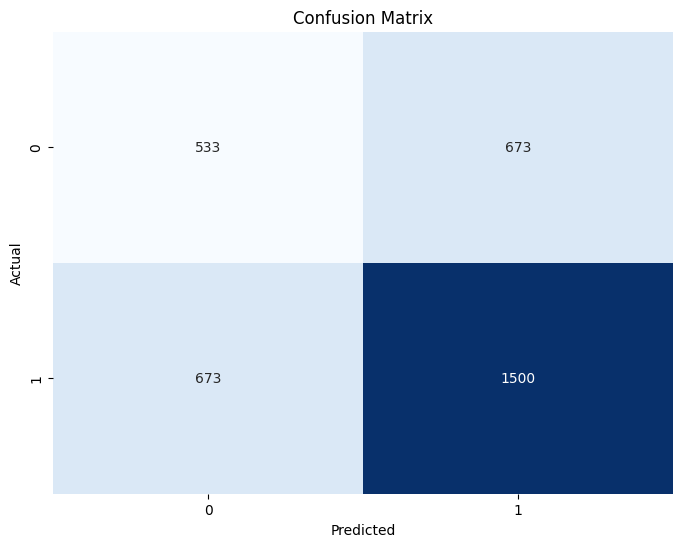

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6016572950577094

In [59]:
# Text preprocessing function
def preprocess_text(text):
    ps = PorterStemmer()
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review


# Function to predict
def predict_statement(statement, model):
    voc_size = 5000
    sent_length = 20

    # Preprocess the user input
    processed_statement = preprocess_text(statement)

    # One-hot encode the preprocessed statement
    input_data = [one_hot(processed_statement, voc_size)]
    padded_input = pad_sequences(input_data, padding='pre', maxlen=sent_length)

    # Make a prediction
    prediction = model.predict(np.array(padded_input))

    # Convert prediction to 0 or 1
    prediction = (prediction > 0.5).astype(int)

    return prediction[0][0]

In [60]:
# # Load the pre-trained model
# model = load_model()

# Take input from the user
# user_input = input("Enter a statement: ")

#example 1 (real news)
# user_input = """Hillary Clinton agrees with John McCain 
# "by voting to give George Bush the benefit of the doubt on Iran."""


# example 2 (fake news)
user_input = """Health care reform legislation is likely to mandate free sex change surgeries."""
# Predict the label (0 or 1)
result = predict_statement(user_input, model)

if result == 0:
    print("The statement is mostly true or true.")
else:
    print("The statement is false or barely true.")

1/1 [==============================] - 0s 20ms/step
The statement is false or barely true.


In [61]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/kaggle/working/fake_news_predict.h5')

In [62]:
#example 1 (real news)
user_input = """Hillary Clinton agrees with John McCain 
"by voting to give George Bush the benefit of the doubt on Iran."""

result = predict_statement(user_input, loaded_model)

if result == 0:
    print("The statement is mostly true or true.")
else:
    print("The statement is false or barely true.")

1/1 [==============================] - 0s 312ms/step
The statement is false or barely true.


In [63]:
#example 2 (real news)
user_input = """Karnataka bandh: Cabs, autos off roads, chaos at airport, several detained"""

result = predict_statement(user_input, loaded_model)

if result == 0:
    print("The statement is mostly true or true.")
else:
    print("The statement is false or barely true.")

1/1 [==============================] - 0s 19ms/step
The statement is mostly true or true.
